In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [4]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


In [5]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9473684210526315
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



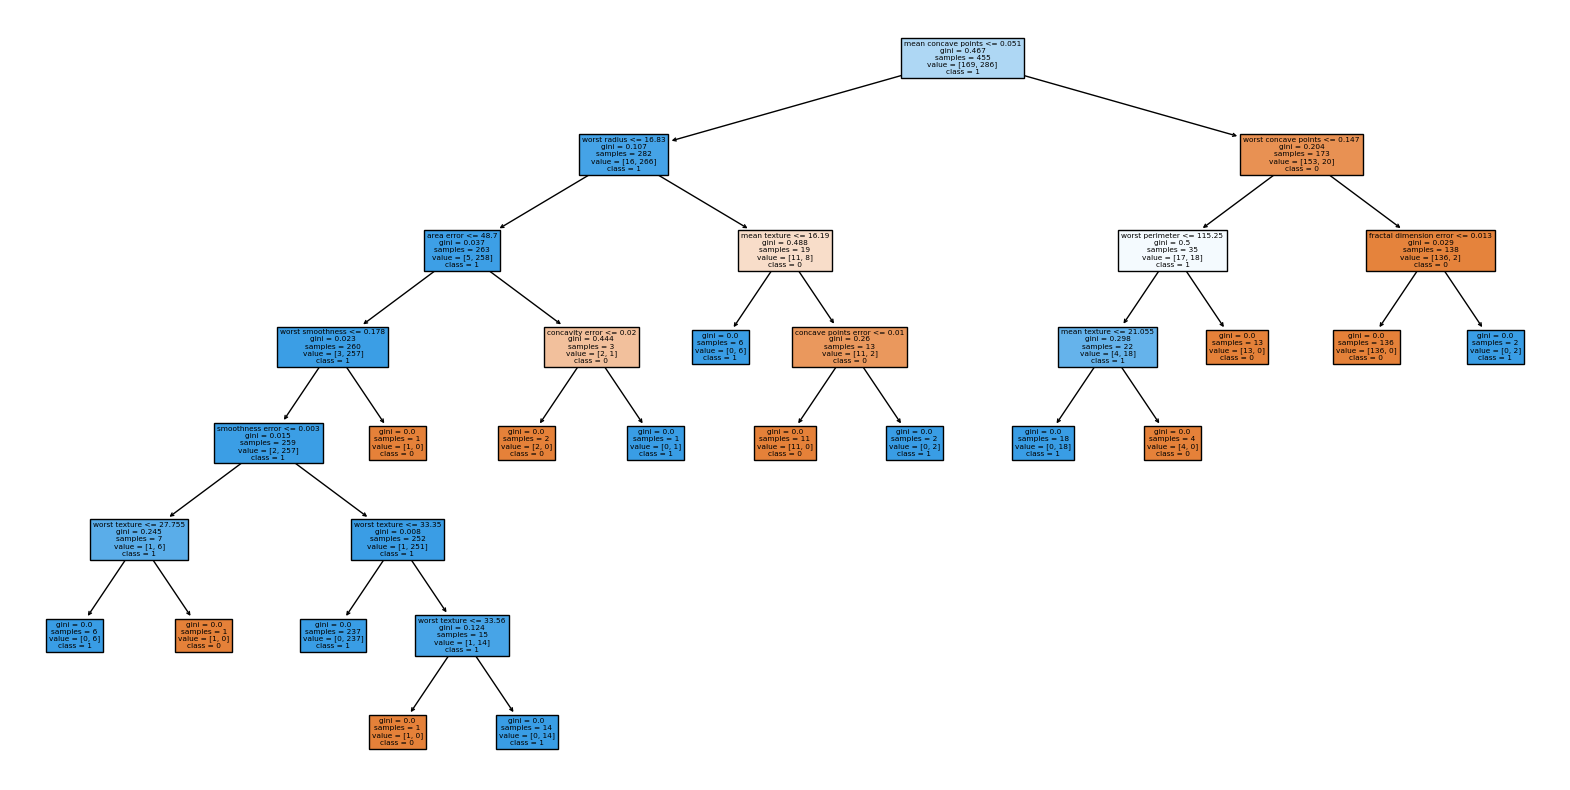

In [6]:
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['0','1'])
plt.show()


In [7]:
dt_small = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_small.fit(X_train, y_train)
print("Small Tree Accuracy:", dt_small.score(X_test, y_test))


Small Tree Accuracy: 0.9473684210526315


In [8]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [9]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [10]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10)


worst area              0.153892
worst concave points    0.144663
mean concave points     0.106210
worst radius            0.077987
mean concavity          0.068001
worst perimeter         0.067115
mean perimeter          0.053270
mean radius             0.048703
mean area               0.047555
worst concavity         0.031802
dtype: float64

In [11]:
scores = cross_val_score(rf, X, y, cv=5)
print("Cross Validation Accuracy:", scores.mean())


Cross Validation Accuracy: 0.9560937742586555
